In [2]:
#import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
a=np.load("mnist.npz")                   #loading the dataset and split it to train and test
test_x=np.array(a["x_test"])
test_y=np.array(a["y_test"])
train_x=np.array(a["x_train"])
train_y=np.array(a["y_train"])
print('X_train: ' + str(train_x.shape)) 
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))  #We can see that we have 60000 matrix that have 28 column and 28 row for train and 10000 for test 


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


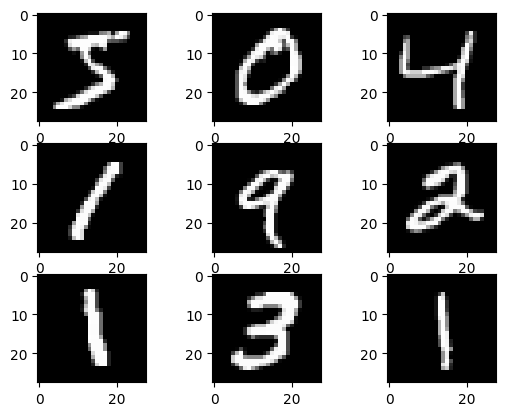

In [4]:
from matplotlib import pyplot                                    #we take a brief look to our data (imshow convrt a matrix to image and cmap is for the color of images)
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray')) 
pyplot.show()

3


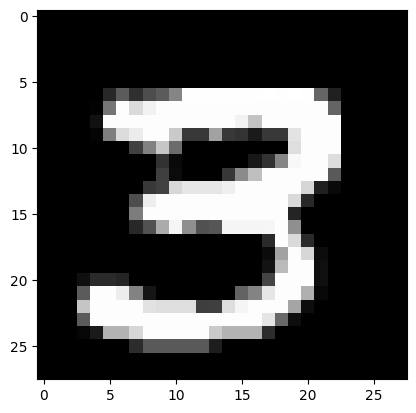

In [5]:
index=111              #for another  example we can see 3(train[111]) and its label :
img=train_x[index]
print(train_y[index])
plt.gray()
plt.imshow(img)


In [6]:
train_x = train_x.reshape((len(train_x), -1))
test_x= test_x.reshape((len(test_x), -1))

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(train_x,train_y, test_size=0.2, random_state=42)



In [17]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_split=5,min_samples_leaf=2,max_features=None,random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [18]:
# Make predictions on the validation set
validation_y_pred = clf.predict(x_validation)

In [21]:
from sklearn.metrics import accuracy_score
validation_accuracy = accuracy_score(y_validation, validation_y_pred)
print(f"Accuracy on the validation set: {validation_accuracy:.4f}")

Accuracy on the validation set: 0.8706


In [22]:

y_test_pred = clf.predict(test_x)
test_accuracy = accuracy_score(test_y, y_test_pred)
test_accuracy

0.8776

In [28]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns
precision = precision_score(test_y, y_test_pred, average='weighted')
recall = recall_score(test_y, y_test_pred, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.8771
Recall: 0.8776


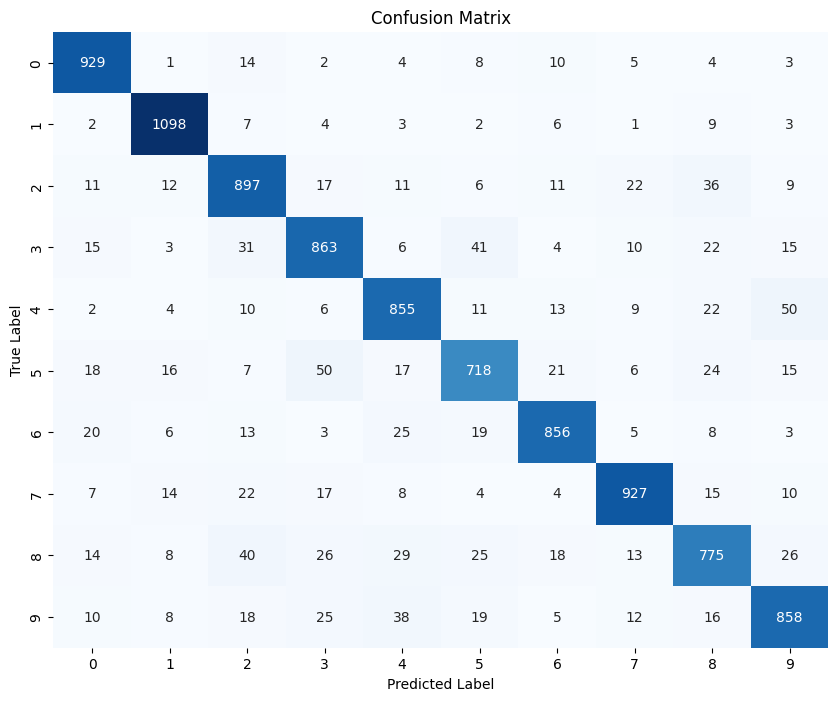

In [30]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(test_y, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()